In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from numpy import percentile

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

In [111]:
#now lets read our data
train_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

In [7]:
#lets check how our data looks
train_data.head(10)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2
5,1,0,127,72,246,256,1137516,1136929,177,177.184821,0,1,0,0,0,1
6,0,1,99,39,242,359,87212,87169,3369,3369.037497,0,0,1,0,0,1
7,0,1,136,38,48,202,697615,696534,6159,6159.902918,0,0,1,0,0,1
8,0,1,121,43,42,214,4401789,4401986,5667,5667.675157,0,0,1,0,0,1
9,1,0,115,99,1289,1304,1005611,1006124,281,281.072866,1,0,0,0,0,1


In [8]:
test_data.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [9]:
train_data.tail()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
1353,0,1,133,37,583,599,54808,55435,319,319.230467,0,0,0,0,0,1
1354,0,1,145,35,1169,1192,293279,293314,467,467.349309,0,0,0,0,0,2
1355,0,1,145,47,1197,1203,818707,818988,316,316.449571,0,0,0,1,0,1
1356,1,0,126,84,651,672,2162298,2162999,122,122.518578,0,0,0,0,0,2
1357,0,1,163,40,99,129,2633215,2633085,330,330.278867,0,0,0,0,0,2


In [10]:
test_data.tail()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
578,1,0,153,55,1479,1494,1249666,1249598,198,198.846687,0,0,0,0,0
579,0,1,147,43,103,161,157594,156565,2703,2703.985608,0,0,1,0,0
580,0,1,141,44,1,388,509942,511791,21195,21195.427257,0,0,1,0,0
581,0,1,212,150,414,451,137693,138014,9169,9169.287230,1,0,0,0,0
582,0,1,155,45,1217,1225,1413795,1413998,22,22.200599,0,0,0,1,0


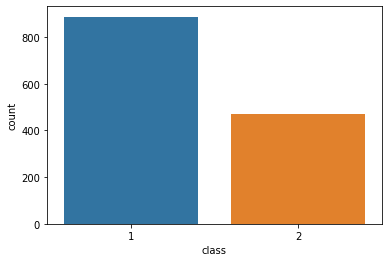

In [11]:
#lets see the distribution of the target variable
sns.countplot(train_data['class'])

In [320]:
#lets get the size of the test and train data
train_data.shape, test_data.shape

((1358, 16), (583, 15))

In [321]:
#lets get a list of our features
print(train_data.columns.tolist())

['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity', 'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area', 'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'class']


In [322]:
#lets get a description of our data
train_data.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [323]:
#lets get more info about our data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_A_Component_1  1358 non-null   int64  
 1   grade_A_Component_2  1358 non-null   int64  
 2   max_luminosity       1358 non-null   int64  
 3   thickness            1358 non-null   int64  
 4   xmin                 1358 non-null   int64  
 5   xmax                 1358 non-null   int64  
 6   ymin                 1358 non-null   int64  
 7   ymax                 1358 non-null   int64  
 8   pixel_area           1358 non-null   int64  
 9   log_area             1358 non-null   float64
 10  x_component_1        1358 non-null   int64  
 11  x_component_2        1358 non-null   int64  
 12  x_component_3        1358 non-null   int64  
 13  x_component_4        1358 non-null   int64  
 14  x_component_5        1358 non-null   int64  
 15  class                1358 non-null   i

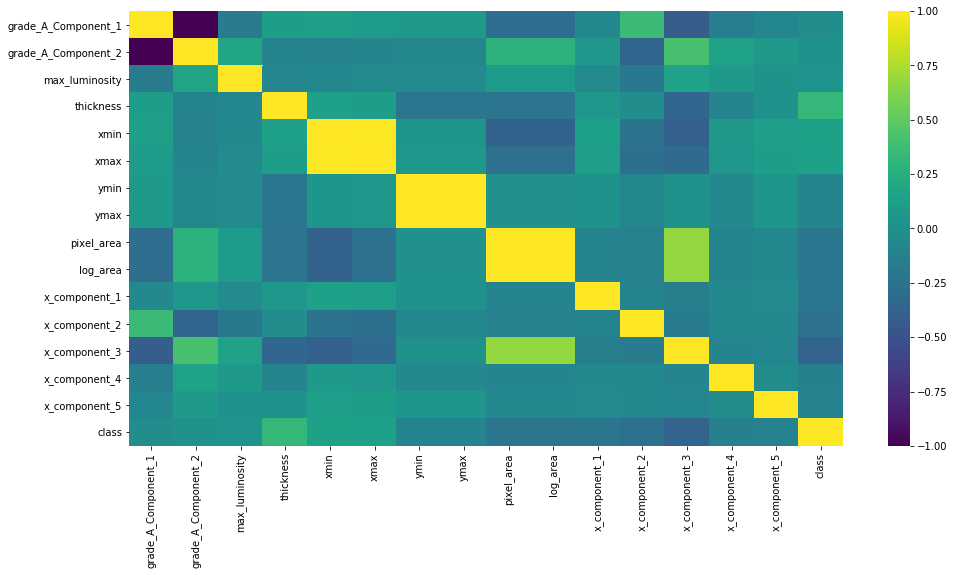

In [324]:
#from the information above, there seems to be only numeric features and no missing values
#lets see the features with high correlation with the target variable
f, ax = plt.subplots(figsize = (16, 8))
correlation_matrix = sns.heatmap(train_data.corr(), cmap = 'viridis')

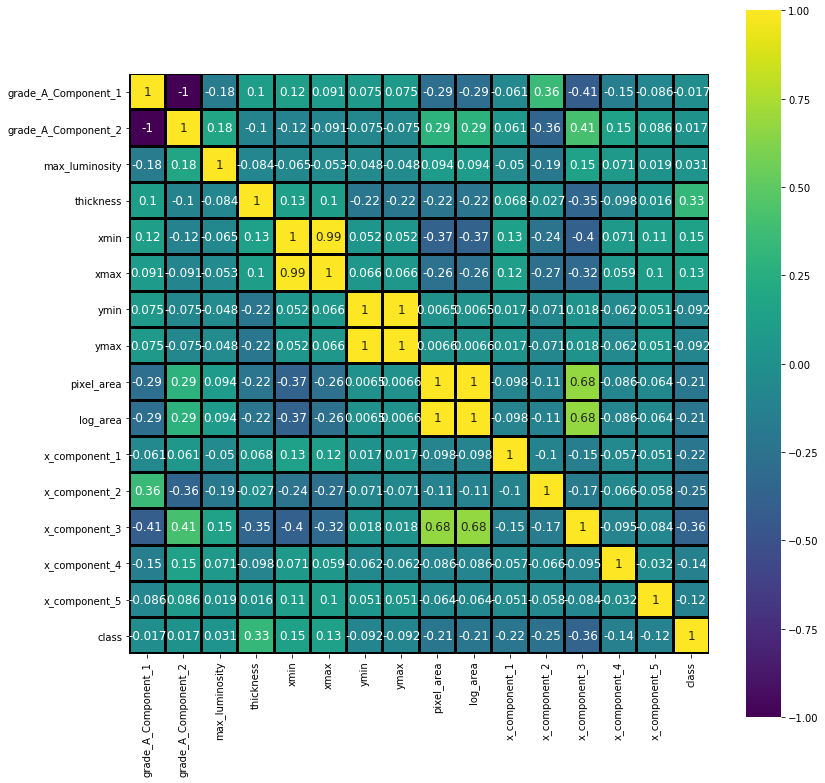

In [12]:
fig,axs=plt.subplots(nrows=1,figsize=(13,13))
sns.heatmap(train_data.corr(),
           annot=True,square=True,cmap='viridis',
           linewidths=2,linecolor='black',annot_kws={'size':12})

In [112]:
train_data['x_components']=train_data['x_component_1'] + train_data['x_component_2']+train_data['x_component_3']+train_data['x_component_4']+train_data['x_component_5']
test_data['x_components']=test_data['x_component_1'] + test_data['x_component_2']+test_data['x_component_3']+test_data['x_component_4']+test_data['x_component_5']

In [113]:
train_data.drop(['xmin', 'ymin','pixel_area','grade_A_Component_2','x_component_1','x_component_2','x_component_2','x_component_3','x_component_4','x_component_5'], axis=1, inplace=True)
test_data.drop(['xmin', 'ymin','pixel_area','grade_A_Component_2','x_component_1','x_component_2','x_component_2','x_component_3','x_component_4','x_component_5'], axis=1, inplace=True)

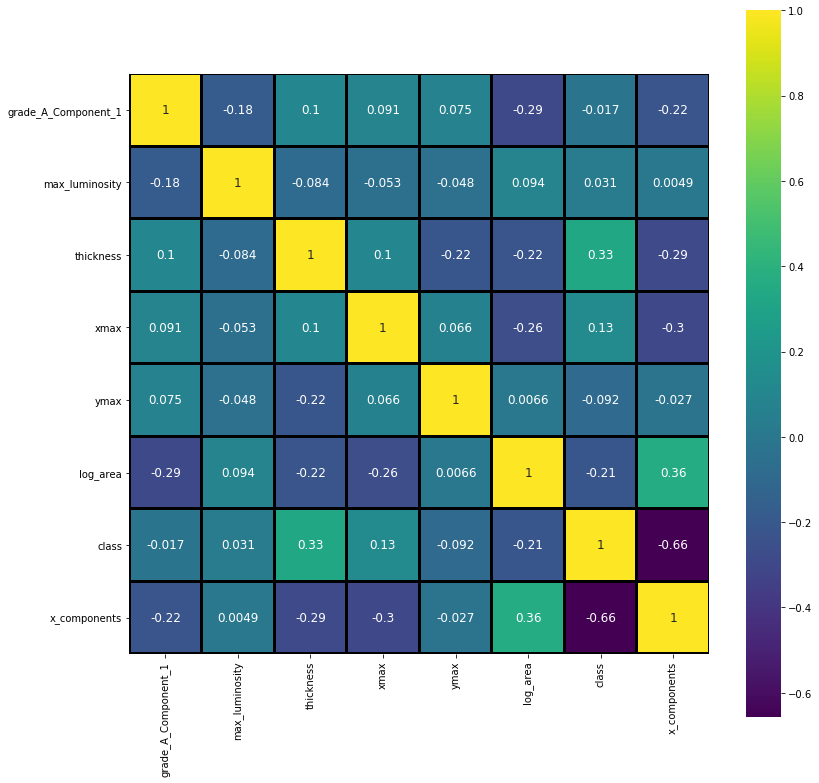

In [29]:
fig,axs=plt.subplots(nrows=1,figsize=(13,13))
sns.heatmap(train_data.corr(),
           annot=True,square=True,cmap='viridis',
           linewidths=2,linecolor='black',annot_kws={'size':12})

In [283]:
corr_train_data = train_data.corr()
print(corr_train_data.nlargest(5, 'x_component_3')['x_component_3'])

x_component_3     1.000000
log_area          0.677639
max_luminosity    0.150255
ymax              0.018027
x_component_1    -0.147939
Name: x_component_3, dtype: float64


In [284]:
#thickness seems to be correlated, whichh makes sense... lets see the correlated value
corr_train_data = train_data.corr()
print("Top 10 Numeric Columns which are highly correlated to class are:")
print(corr_train_data.nlargest(10, 'class')['class'])


Top 10 Numeric Columns which are highly correlated to class are:
class                  1.000000
thickness              0.329639
xmax                   0.130023
max_luminosity         0.031459
grade_A_Component_1   -0.017173
ymax                  -0.092485
log_area              -0.214127
x_component_1         -0.217409
x_component_2         -0.250969
x_component_3         -0.361329
Name: class, dtype: float64


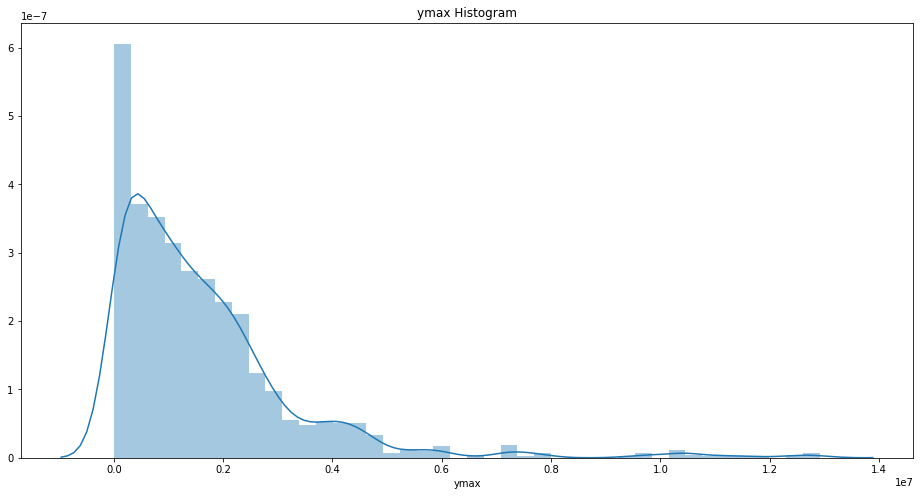

In [285]:
plt.figure(figsize = (16, 8))

sns.distplot(train_data["ymax"])
plt.title("ymax Histogram")
plt.xlabel("ymax")
plt.show()

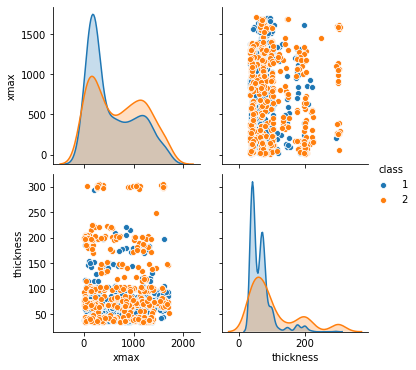

In [342]:
sns.pairplot(train_data, hue='class', vars= ['xmax','thickness'])

In [286]:
#from the plots above, we can see some outliers... lets try to remove them
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['xmax']<1000)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['max_luminosity']<200)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>10000) & (train_data['max_luminosity']>250)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['ymax']<5000000)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['thickness']<100)].index).reset_index(drop=True)


In [287]:
train_data = train_data.drop(train_data[(train_data['thickness']>250) & (train_data['log_area']<10000)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['thickness']>250) & (train_data['max_luminosity']<200)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['thickness']>250) & (train_data['xmax']<2000)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['thickness']>250) & (train_data['ymax']<5000000)].index).reset_index(drop=True)


In [114]:
list_feature=train_data.columns.tolist()
print(list_feature)

['grade_A_Component_1', 'max_luminosity', 'thickness', 'xmax', 'ymax', 'log_area', 'class', 'x_components']


In [31]:
for i in list_feature:
    if i !='class':
        q25, q75 = percentile([train_data[i]], 25), percentile(train_data[i], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        train_data = train_data.drop(train_data[(train_data[i]<lower) & (train_data[i]>upper)].index).reset_index(drop=True)
        test_data = test_data.drop(test_data[(test_data[i]<lower) & (test_data[i]>upper)].index).reset_index(drop=True)

In [32]:
train_data.shape

(1358, 8)

In [33]:
test_data.shape

(583, 7)

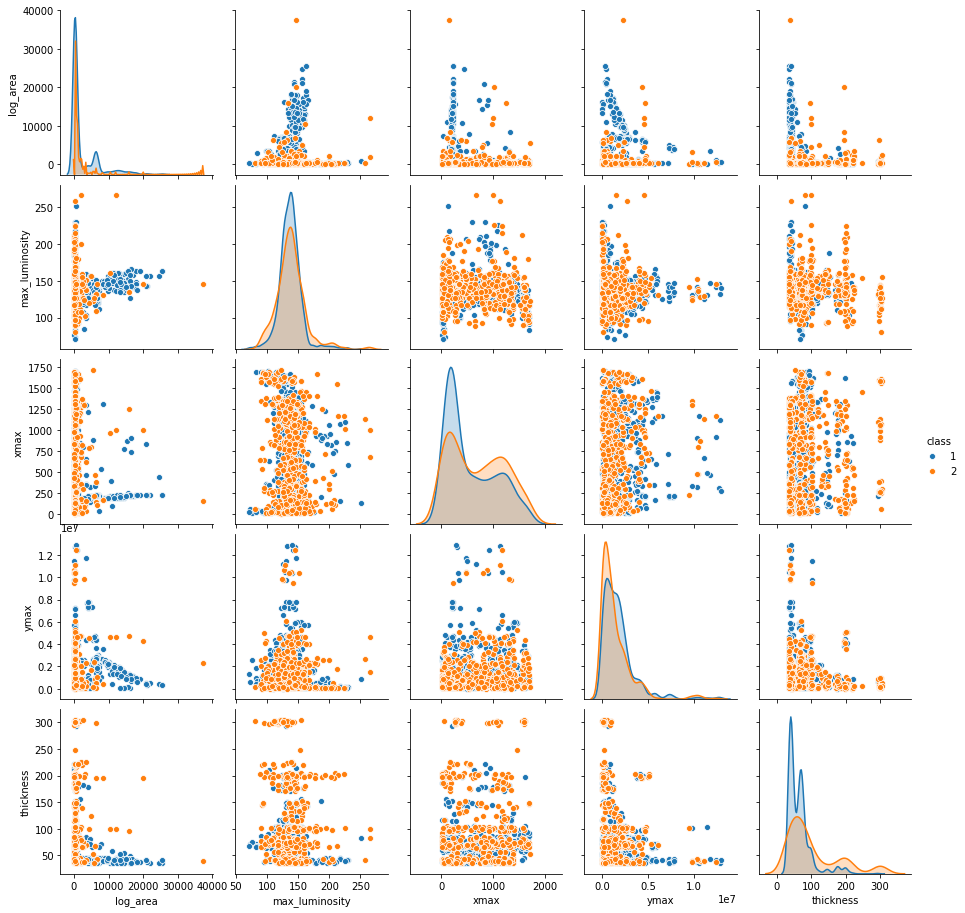

In [34]:
sns.pairplot(train_data, hue='class', vars= ['log_area','max_luminosity','xmax','ymax','thickness'])

In [115]:
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['xmax']<1000)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['max_luminosity']<200)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>10000) & (train_data['max_luminosity']>250)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['ymax']<5000000)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['log_area']>30000) & (train_data['thickness']<100)].index).reset_index(drop=True)


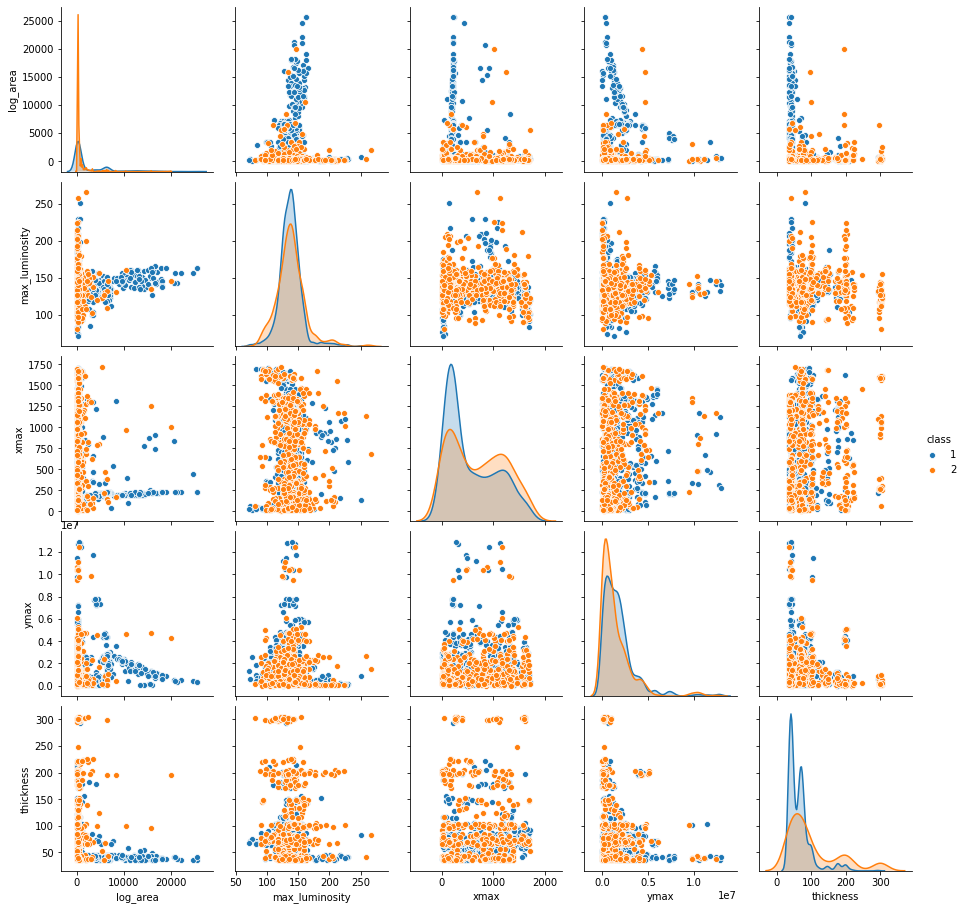

In [55]:
sns.pairplot(train_data, hue='class', vars= ['log_area','max_luminosity','xmax','ymax','thickness'])

In [116]:
train_data['log_area']=train_data['log_area'].transform(np.log)

In [117]:
test_data['log_area']=test_data['log_area'].transform(np.log)

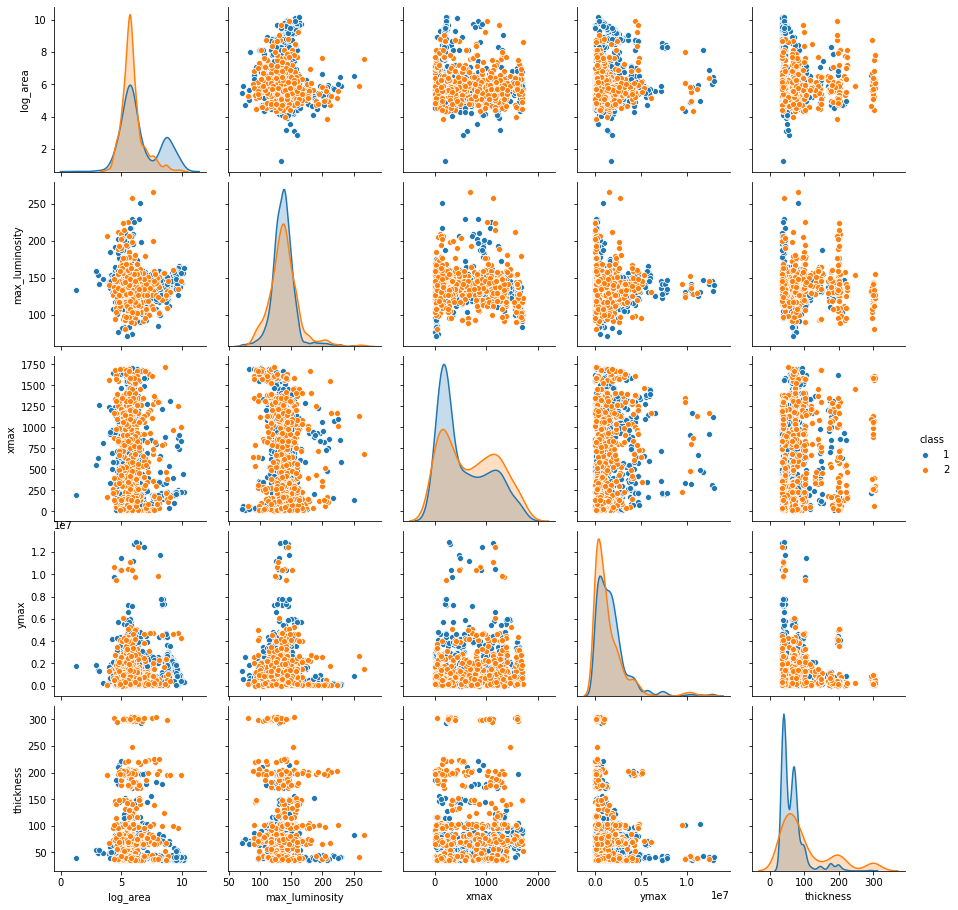

In [38]:
sns.pairplot(train_data, hue='class', vars= ['log_area','max_luminosity','xmax','ymax','thickness'])

In [118]:
train_data['thickness']=train_data['thickness'].transform(np.log)
train_data['xmax']=train_data['xmax'].transform(np.log)
train_data['ymax']=train_data['ymax'].transform(np.log)

In [119]:
test_data['thickness']=test_data['thickness'].transform(np.log)
test_data['xmax']=test_data['xmax'].transform(np.log)
test_data['ymax']=test_data['ymax'].transform(np.log)

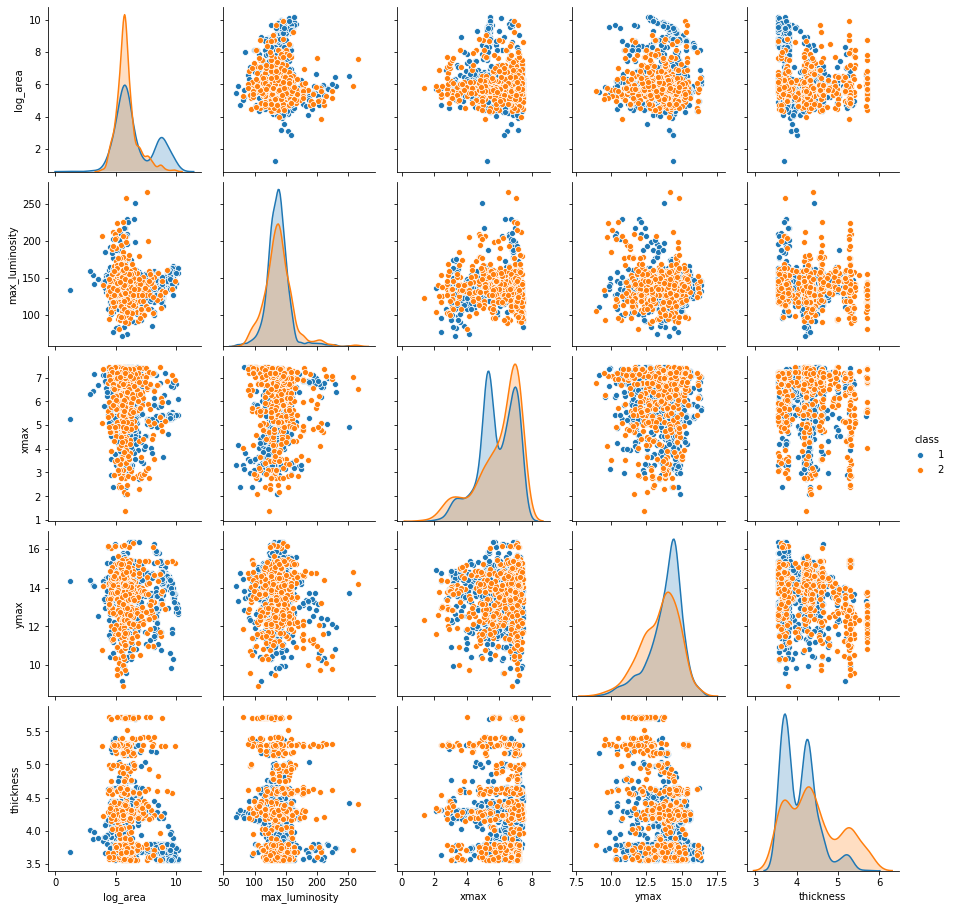

In [40]:
sns.pairplot(train_data, hue='class', vars= ['log_area','max_luminosity','xmax','ymax','thickness'])

In [120]:
for i in list_feature:
    if i !='class':
        q25, q75 = percentile([train_data[i]], 25), percentile(train_data[i], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        train_data = train_data.drop(train_data[(train_data[i]<lower) & (train_data[i]>upper)].index).reset_index(drop=True)
        test_data = test_data.drop(test_data[(test_data[i]<lower) & (test_data[i]>upper)].index).reset_index(drop=True)

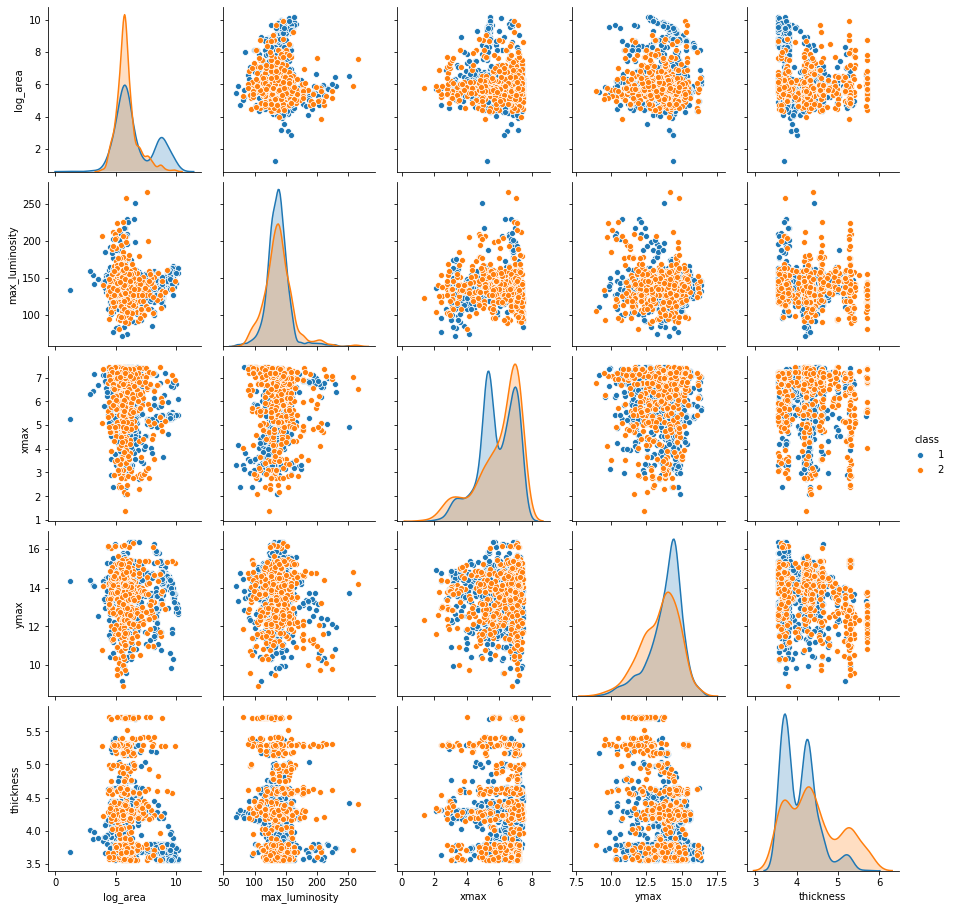

In [42]:
sns.pairplot(train_data, hue='class', vars= ['log_area','max_luminosity','xmax','ymax','thickness'])

In [121]:
train_data.head(10)

,grade_A_Component_1,max_luminosity,thickness,xmax,ymax,log_area,class,x_components
0,0,150,3.583519,5.147494,13.761405,6.084726,1,1
1,1,134,4.007333,7.049255,14.682453,5.796683,1,1
2,1,135,4.174387,6.881411,13.851605,5.704184,2,0
3,0,123,3.555348,5.393628,14.349430,8.825233,1,1
4,1,138,4.234107,6.144186,13.898545,5.527053,2,0
5,1,127,4.276666,5.545177,13.943841,5.177193,1,1
6,0,99,3.663562,5.883322,11.375604,8.122382,1,1
7,0,136,3.637586,5.308268,13.453872,8.725816,1,1
8,0,121,3.761200,5.365976,15.297566,8.642534,1,1
9,1,115,4.595120,7.173192,13.821616,5.638614,1,1


In [122]:
target_feature=train_data['class']
train_data.drop(['class'], axis=1, inplace=True)

In [123]:
#NOW... LETS TRY TO APPLY SOME FORM OF SCALING TO OUR DATA. WE WILL BE USING MINMAX... ROBUST SCALER WILL BE APLIED IN THE PIPELINE
#before that, lets split our training and vaidation set
X_train, X_valid, y_train,y_valid=train_test_split(train_data,target_feature,test_size=0.2)

In [124]:
min_max=MinMaxScaler(feature_range=(0,1))

In [125]:
min_max.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [126]:
X_train=min_max.transform(X_train)

In [127]:
X_valid=min_max.transform(X_valid)

In [128]:
test_data=min_max.transform(test_data)

In [129]:
X_train.shape

(1084, 7)

In [130]:
X_train[:5]

array([[0.        , 0.45128205, 0.74865073, 0.80453186, 0.63279303,
        0.29190413, 0.        ],
       [0.        , 0.23589744, 0.98772283, 0.6966595 , 0.42881987,
        0.52483316, 0.        ],
       [1.        , 0.32307692, 0.29993323, 0.54520488, 0.74219919,
        0.3034168 , 1.        ],
       [0.        , 0.35384615, 0.15541703, 0.90149372, 0.80514987,
        0.37265959, 0.        ],
       [1.        , 0.3025641 , 0.64033145, 0.79315073, 0.67391045,
        0.433637  , 0.        ]])

In [131]:
X_valid[:5]

array([[0.        , 0.4       , 0.04998402, 0.63773571, 0.77435991,
        0.85164798, 1.        ],
       [0.        , 0.34871795, 0.8073839 , 0.93616018, 0.48854706,
        0.46028937, 1.        ],
       [1.        , 0.28717949, 0.34583352, 0.91871692, 0.5930349 ,
        0.42000989, 0.        ],
       [0.        , 0.31282051, 0.10570227, 0.37137531, 0.67497486,
        0.43225357, 0.        ],
       [1.        , 0.38974359, 0.31351955, 0.79449188, 0.83877885,
        0.32824466, 0.        ]])

In [74]:
#lets bring in our models and see if we have processed our data well...
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)

In [75]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
y_predict=clf.predict(X_valid)

In [77]:
roc_auc_score(y_valid, y_predict)

0.8413815065717098

In [78]:
log_loss(y_valid,y_predict)

21.714218730479008

In [79]:
clf.score(X_valid,y_valid)

0.8566176470588235

In [80]:
clf.score(X_train,y_train)

0.8883763837638377

In [81]:
#lets see hhoe the logistic regression will fare
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(C=500)

In [82]:
lgr.fit(X_train,y_train)

LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
lgr.score(X_valid,y_valid)

0.8198529411764706

In [84]:
y_pred=lgr.predict(X_valid)

In [85]:
log_loss(y_valid,y_pred)

21.714218730479008

In [86]:
confusion = confusion_matrix(y_valid, y_pred)
print(confusion)

[[142  29]
 [ 20  81]]


In [87]:
lgr.score(X_train,y_train)

0.8321033210332104

In [181]:
parameters={'svc__C':[0.001, 0.01, 0.1, 1, 10, 100],
                      'svc__gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
pipe=make_pipeline(RobustScaler(),SVC(probability=True))
grid=GridSearchCV(pipe,param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                   

In [182]:
print('best parameters:',grid.best_params_)

best parameters: {'svc__C': 100, 'svc__gamma': 0.1}


In [167]:
svc_final.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [183]:
svc_final=SVC(C=100, gamma=0.1, probability=True)

In [168]:
y_predi=svc_final.predict(X_valid)

In [169]:
confusion = confusion_matrix(y_valid, y_predi)
print(confusion)

[[153  26]
 [ 19  74]]


In [173]:
y_valid[:20],list(y_predi[:20]) 

(504     1
 580     1
 304     1
 829     2
 475     2
 982     1
 830     1
 286     1
 487     2
 746     1
 1295    2
 736     1
 346     2
 291     1
 161     1
 1249    2
 794     1
 1320    1
 652     1
 1336    2
 Name: class, dtype: int64,
 [1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [179]:
y_val=pd.read_excel('submitted_rfc.xlsx')

In [189]:
y_val[:5],predict[:5]

(          1         2
 0  0.780000  0.220000
 1  0.000000  1.000000
 2  0.226190  0.773810
 3  0.544118  0.455882
 4  0.257143  0.742857,
 array([[0.54946256, 0.45053744],
        [0.54946256, 0.45053744],
        [0.54946256, 0.45053744],
        [0.54946256, 0.45053744],
        [0.54946256, 0.45053744]]))

In [190]:
confusion = confusion_matrix(y_val,predict)
print(confusion)

ValueError: continuous-multioutput is not supported

In [184]:
svc_final.fit(train_data,target_feature)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
print("test set score: ", grid.score(X_valid, y_valid))

test set score:  0.8860294117647058


In [188]:
predict=svc_final.predict_proba(test_data)

In [92]:
y_predi=grid.predict(X_valid)

In [93]:
log_loss(y_valid,y_predi)

21.714218730479008

In [302]:
test_data.shape

(583, 9)

In [138]:
parameters={'randomforestclassifier__n_estimators':[10,100,500,1000],
                      'randomforestclassifier__max_depth':[3,5,7,9,12]}
pipe=make_pipeline(RobustScaler(),RandomForestClassifier())
grid=GridSearchCV(pipe,param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                   

In [139]:
print('best parameters:',grid.best_params_)

best parameters: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__n_estimators': 500}


In [158]:
rf_final=RandomForestClassifier(n_estimators=500, max_depth=7 )

In [159]:
rf_final.fit(train_data,target_feature)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
predict=rf_final.predict_proba(test_data)

In [161]:
rf_final.score(X_valid,y_valid)

0.7757352941176471

In [100]:
my_pred[:5]

array([[0.90306667, 0.09693333],
       [0.26798607, 0.73201393],
       [0.90979614, 0.09020386],
       [0.90979614, 0.09020386],
       [0.36672606, 0.63327394]])

In [164]:
output=pd.DataFrame({1:predict[:,0],2:predict[:,1]})
output.to_excel('submitted4.xlsx',index=False)

In [270]:
test_data.shape

(583, 15)

In [369]:
print("test set score: ", grid.score(X_valid, y_valid))

test set score:  0.7757352941176471


In [254]:
y_predi=grid.predict(X_valid)

In [255]:
log_loss(y_valid,y_predi)

24.373210228557525

In [256]:
confusion = confusion_matrix(y_valid, y_predi)
print(confusion)

[[169  18]
 [ 27  51]]


In [132]:
parameters={'xgbclassifier__n_estimators':[100,500,1000],
            'xgbclassifier__learning_rate': [0.05,0.005],
            'xgbclassifier__min_child_weight': [10,11],
            'xgbclassifier__max_depth': [6,7,8],
           'xgbclassifier__seed': [1337],
           'xgbclassifier__early_stopping_rounds':[5]}

pipe=make_pipeline(RobustScaler(),XGBClassifier())
grid=GridSearchCV(pipe,param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
               

In [133]:
print("test set score: ", grid.score(X_valid, y_valid))

test set score:  0.8492647058823529


In [134]:
print('best parameters:',grid.best_params_)

best parameters: {'xgbclassifier__early_stopping_rounds': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 10, 'xgbclassifier__n_estimators': 500, 'xgbclassifier__seed': 1337}


In [135]:
xgb_final=XGBClassifier(early_stopping_rounds=5,learning_rate=0.005,max_depth=6,min_child_weight=10,n_estimators=1000,seed=1337)

In [136]:
xgb_final.fit(train_data,target_feature)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
              gamma=0, learning_rate=0.005, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=None, subsample=1, verbosity=1)

In [137]:
my_pred1=xgb_final.predict_proba(test_data)

ValueError: feature_names mismatch: ['grade_A_Component_1', 'max_luminosity', 'thickness', 'xmax', 'ymax', 'log_area', 'x_components'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']
expected thickness, xmax, grade_A_Component_1, x_components, max_luminosity, log_area, ymax in input data
training data did not have the following fields: f6, f3, f4, f2, f1, f5, f0

In [261]:
y_p=grid.predict(X_valid)

In [262]:
confusion = confusion_matrix(y_valid, y_p)
print(confusion)

[[168  19]
 [ 29  49]]


In [263]:
log_loss(y_valid,y_p)

24.373210228557525

In [ ]:
estimators = [
...     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
...     ('svr', 
... ]